<a href="https://colab.research.google.com/github/benmcnertney/DESC624/blob/main/DataPreparationPythonCode1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Preparation**

To demonsterate this part of the class we are going to use these data sets are adapted from the bank‐additional‐full.txt data set from the UCI Machine Learning Repository. We use only four predictors (age, educations, previous_outcome, and days_since_previous), plus the target, response. The data relate to a phone‐based direct marketing campaign conducted by a bank in Portugal. The bank was interested in whether or not the contacts would subscribe to a term deposit account with the bank. The bank_marketing_training data set contains 26,874 records, while bank_marketing_test contains 10,255 records.

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/ArashVafa/DESC624/master/bank_marketing_training'
bank_train = pd.read_csv(url)
bank_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,days_since_previous,previous,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [2]:
bank_train.shape

(26874, 21)

Once we know the number of records, we create a new variable that assigns every record a unique integer.



In [3]:
bank_train['index'] = pd.Series(range(0,26874))

In [18]:
bank_train.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous_outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,index,education_numeric,age_z
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,0,4.0,1.539625
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,1,12.0,1.635778
2,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,2,NaN,0.097330
3,25,services,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,3,12.0,-1.441118
4,29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,4,12.0,-1.056506
5,57,housemaid,divorced,basic.4y,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,5,4.0,1.635778
6,35,blue-collar,married,basic.6y,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,6,6.0,-0.479588
7,39,management,single,basic.9y,unknown,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,7,9.0,-0.094976
8,30,unemployed,married,high.school,no,no,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,8,12.0,-0.960353
9,55,retired,single,high.school,no,yes,no,telephone,may,mon,...,nonexistent,1.1,93.994,-36.4,4.857,5191,no,9,12.0,1.443472


**Changing Misleading Values**

<Axes: ylabel='Frequency'>

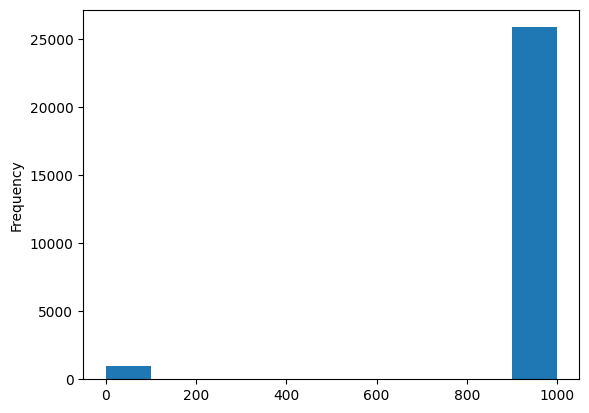

In [5]:
bank_train['days_since_previous'].plot(kind = 'hist')

In [7]:
import numpy as np
bank_train['days_since_previous'] = bank_train['days_since_previous'].replace({999: np.nan})

<Axes: title={'center': 'Histogram of Days Since Previous'}, xlabel='Days Since', ylabel='Frequency'>

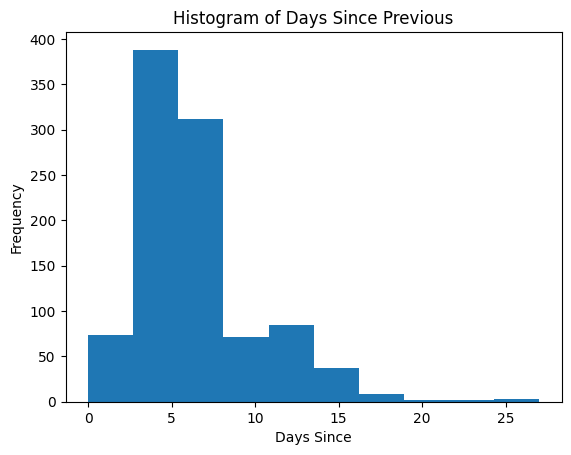

In [9]:
bank_train['days_since_previous'].plot(kind = 'hist', title = 'Histogram of Days Since Previous',xlabel='Days Since')

In [10]:
bank_train['education_numeric'] = bank_train['education']

In [12]:
dict_edu = {"education_numeric": {"illiterate": 0, "basic.4y": 4, "basic.6y": 6,     "basic.9y": 9, "high.school":12, "professional.course": 12, "university.degree":16,
     "unknown": np.nan}}

In [15]:
bank_train.replace(dict_edu, inplace=True)

/tmp/ipython-input-4011865072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_train.replace(dict_edu, inplace=True)


Standarizing the numeric fields

In [17]:
from scipy import stats
bank_train['age_z'] = stats.zscore(bank_train['age'])

<Axes: xlabel='Age', ylabel='Frequency'>

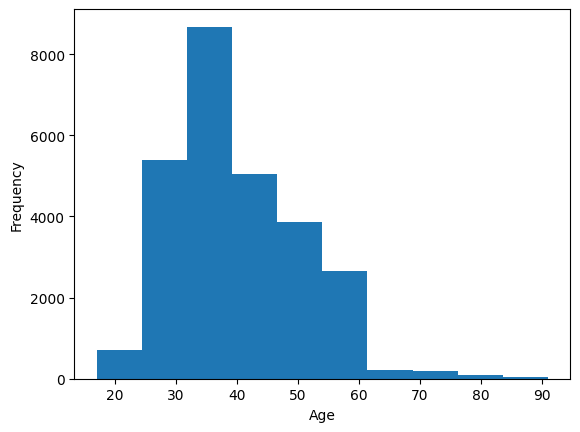

In [21]:
bank_train['age'].plot(kind = 'hist',xlabel='Age')

<Axes: ylabel='Frequency'>

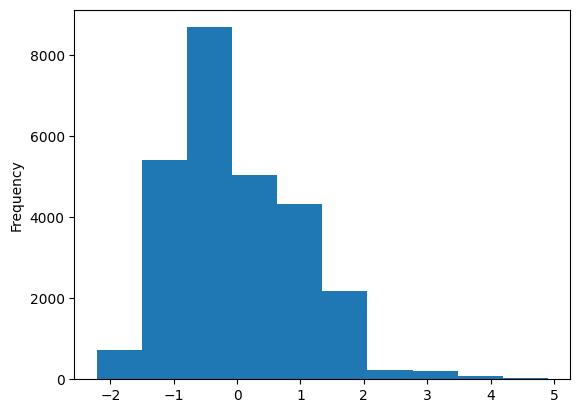

In [22]:
bank_train['age_z'].plot(kind = 'hist')